In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('diabetes.csv')

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
norms = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

In [0]:
# normalising using pandas
df[norms] = df[norms].apply(lambda x : (x - x.min() ) / ( x.max() - x.min() ))

In [0]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1


In [0]:
import tensorflow as tf

In [0]:
preg = tf.feature_column.numeric_column('Pregnancies')
glu = tf.feature_column.numeric_column('Glucose')
bloodp = tf.feature_column.numeric_column('BloodPressure')
skin = tf.feature_column.numeric_column('SkinThickness')
insu = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
dia = tf.feature_column.numeric_column('DiabetesPedigreeFunction')

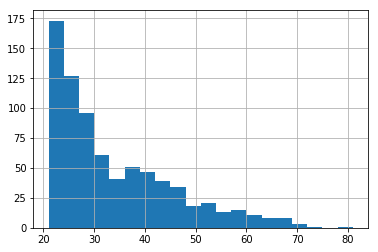

In [0]:
df['Age'].hist(bins=20)

In [0]:
# convert continuous value in bucket
# age_bucket = tf.feature_column.bucketized_column('Age',boundaries=[20,30,40,50,60,70,80])  this acept numeric column
# so first convert it in numeric col
age = tf.feature_column.numeric_column('Age')


In [0]:
# now in bucket
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [0]:
##############################

# if you have a categorical column in your dataset you nead to convert it like this

# tf.feature_column.categorical_column_with_vocabulary_list( cat_col_name, [attributes in colms like a,b,c,d])


# but if you dont know that how many different type of attr are there then use this
# tf.feature_column.categorical_column_with_hash_bucket( cat_col_name, hash_bucket_size=20)

In [0]:
x_data = df.drop('Outcome',axis=1)

In [0]:
x_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33


In [0]:
y_label = df['Outcome']

In [0]:
y_label.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [0]:
feat_cols = [preg,glu,bloodp,skin,insu,bmi,age_bucket,dia]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train , x_test , y_train , y_test = train_test_split(x_data,y_label,test_size=0.3)

In [0]:
model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols)

W0721 04:43:19.668903 140450802476928 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpue0tw1ra


In [0]:
iinput_fn = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=50,num_epochs=5,shuffle=True)

In [0]:
train_fn = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=50,num_epochs=5,shuffle=False)

In [0]:
eval_fn = tf.estimator.inputs.pandas_input_fn(x_test,y_test,batch_size=50,num_epochs=5,shuffle=False)


In [0]:
model.train(input_fn=train_fn,steps=1000)

W0721 04:45:35.171815 140450802476928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/training_util.py:236: Variable.initialized_value (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
W0721 04:45:35.201252 140450802476928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_queue_runner.py:62: QueueRunner.__init__ (from tensorflow.python.training.queue_runner_impl) is deprecated and will be removed in a future version.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
W0721 04:45:35.207965 140450802476928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_estimator/python/estimator/inputs/queues/feeding_functions.py:500: add_

In [0]:
result = model.evaluate(input_fn=eval_fn, steps=1000)

W0721 04:46:12.976106 140450802476928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/metrics_impl.py:2027: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
W0721 04:46:13.400631 140450802476928 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0721 04:46:13.429228 140450802476928 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0721 04:46:13.617599 140450802476928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with th

In [0]:
result

{'accuracy': 0.6926407,
 'accuracy_baseline': 0.6017316,
 'auc': 0.81431806,
 'auc_precision_recall': 0.73659444,
 'average_loss': 0.5677297,
 'global_step': 54,
 'label/mean': 0.3982684,
 'loss': 27.321993,
 'precision': 0.8181818,
 'prediction/mean': 0.2668643,
 'recall': 0.29347825}

# Lets run on more hidden layer

In [0]:
model2 = tf.estimator.DNNClassifier(hidden_units=[10,20,30,10,10],feature_columns=feat_cols)

W0721 04:49:04.272688 140450802476928 estimator.py:1811] Using temporary folder as model directory: /tmp/tmpghlo1ch7


In [0]:
model2.train(input_fn=train_fn,steps=1000)

W0721 04:50:19.881885 140450802476928 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1066: get_checkpoint_mtimes (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file utilities to get mtimes.
W0721 04:50:20.917279 140450802476928 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 65 vs previous value: 65. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.minimize.
W0721 04:50:20.938665 140450802476928 basic_session_run_hooks.py:724] It seems that global step (tf.train.get_global_step) has not been increased. Current value (could be stable): 71 vs previous value: 71. You could increase the global step by passing tf.train.get_global_step() to Optimizer.apply_gradients or Optimizer.m

In [0]:
result = model2.evaluate(input_fn=eval_fn,steps=1000)

W0721 04:50:58.152758 140450802476928 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.
W0721 04:50:58.180341 140450802476928 metrics_impl.py:804] Trapezoidal rule is known to produce incorrect PR-AUCs; please switch to "careful_interpolation" instead.


In [0]:
result

{'accuracy': 0.73593074,
 'accuracy_baseline': 0.6017316,
 'auc': 0.8085315,
 'auc_precision_recall': 0.7472781,
 'average_loss': 0.5758641,
 'global_step': 108,
 'label/mean': 0.3982684,
 'loss': 27.713457,
 'precision': 0.8039216,
 'prediction/mean': 0.2687333,
 'recall': 0.4456522}